# Pymaceuticals Inc.
---

### Analysis

- It appears when referencing the box plot that Capomulin and Ramicane were the most effective in reducing tumor size. The least being Infubinol and Ceftamin. 
Looking at mouse l509 we saw significant shrinkage when treated with Capomulin across the first 35 days of our data, there was an uptick in size after day 35 which is curious. 
Sex did not play a statistically significant role it appears, however weight very much so did when looking at mice traits. Heavier mice tended to have larger tumors. 
 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo = pd.merge(mouse_metadata, study_results, how = 'outer')

# Display the data table for preview
combo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice.
mice = combo['Mouse ID'].value_counts()
nummice = len(mice)
nummice

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmice = combo.loc[combo.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
dupmice

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmiceall = combo.loc[combo['Mouse ID'] == 'g989', :]
dupmiceall

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmice = combo[combo['Mouse ID'].isin(dupmice)==False]
cleanmice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice in the clean DataFrame.
cleanmiceuni = cleanmice['Mouse ID'].nunique()
cleanmiceuni

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
statmice = cleanmice.groupby(cleanmice['Drug Regimen'])

mean = statmice['Tumor Volume (mm3)'].mean()
mead = statmice['Tumor Volume (mm3)'].median()
var = statmice['Tumor Volume (mm3)'].var()
sd = statmice['Tumor Volume (mm3)'].std()
sem = statmice['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties
#  of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
sumstat = pd.DataFrame({'Mean Tumor Volume': mean, 
                        'Meadian Tumor Volume': mead,
                        'Tumor Volume Variance': var,
                        'Tumor Volume Standard Deviation': sd,
                        'Tumor Volume Standard Error': sem})
# Assemble the resulting series into a single summary DataFrame.
sumstat

,Mean Tumor Volume,Meadian Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, 
# standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggstatsum = cleanmice.groupby('Drug Regimen')
advtable = aggstatsum.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
advtable

C:\Users\beabutton\AppData\Local\Temp\ipykernel_4972\831777328.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  advtable = aggstatsum.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
countmpt = cleanmice['Drug Regimen'].value_counts()
countmpt

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

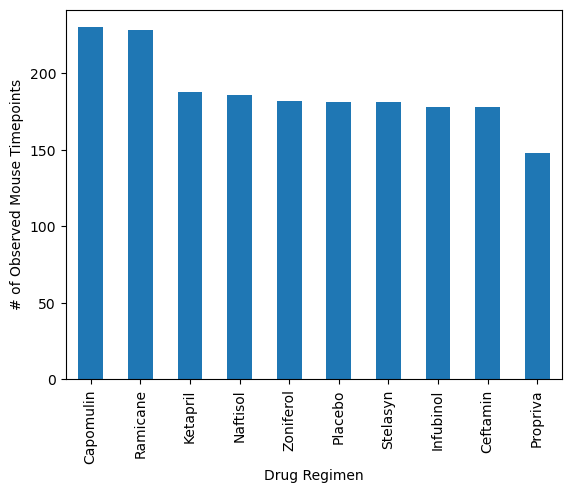

In [72]:

plotp = countmpt.sort_values(ascending=False).plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# plt.title("Number of Mice per Treatment Type")
plt.show()

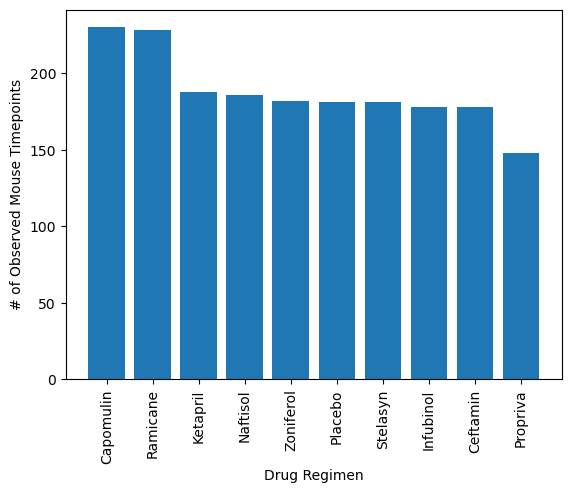

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = countmpt.index.values
y = countmpt.values

plt.bar(x, y)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()



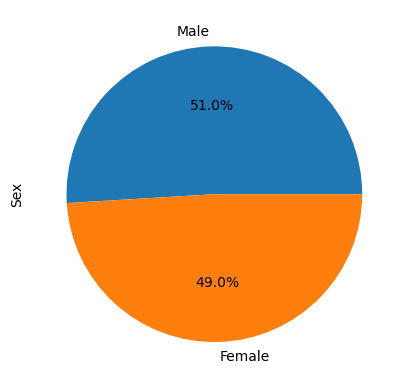

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleanmice['Sex'].value_counts()
sex.plot.pie(autopct = '%1.1f%%')
plt.show()

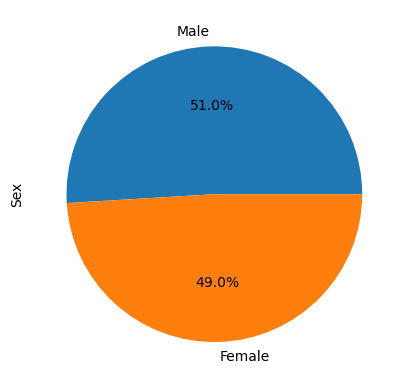

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plotpy = sex.plot.pie(y = 'Total Count', autopct = '%1.1f%%')
plt.ylabel = ('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last = cleanmice.groupby(['Mouse ID'])['Timepoint'].max()
lastpmouse = pd.DataFrame(last)

lastpmouse = pd.merge(cleanmice, lastpmouse, on= ('Mouse ID', 'Timepoint'), how='right')
lastpmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [143]:
# Put treatments into a list for for loop (and later for plot labels)
treat = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorcap = []
tumorram = []
tumorinf = []
tumorcef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in lastpmouse.iterrows():
    if row['Drug Regimen'] == treat[0]:
        tumorcap.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treat[1]:
        tumorram.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treat[2]:
        tumorinf.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treat[3]:
        tumorcef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug = pd.DataFrame({'Capomulin': tumorcap,
                    'Ramicane': tumorram,
                    treat[2]: tumorinf,
                    treat[3]: tumorcef})
    
    # Determine outliers using upper and lower bounds
maxdrug = drug.max()
mindrug = drug.min()



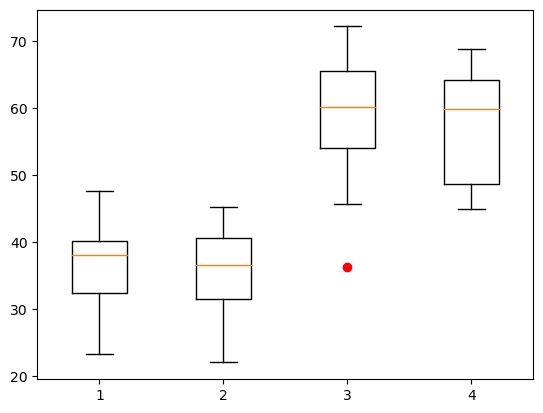

In [171]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(drug, sym='r')

# plt.ylabel('Final Tumor Volume (mm3)')


plt.show()

## Line and Scatter Plots

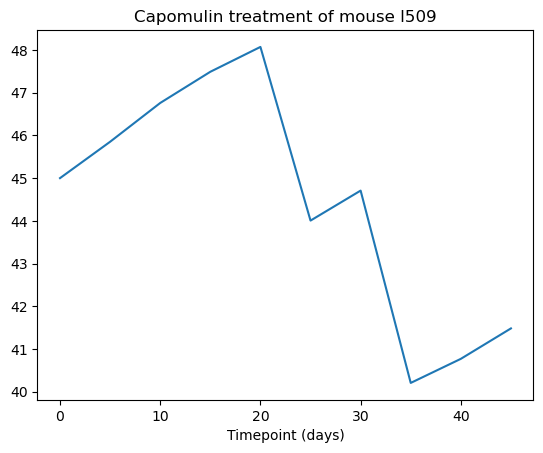

In [152]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line = cleanmice.loc[cleanmice['Mouse ID'] == 'l509', :]
line

linex = line['Timepoint']
liney = line['Tumor Volume (mm3)']


plt.title('Capomulin treatment of mouse l509')
plt.plot(linex, liney)
plt.xlabel('Timepoint (days)')
# plt.ylabel('Tumor Volume (mm3)')

plt.show()

C:\Users\beabutton\AppData\Local\Temp\ipykernel_4972\2972520479.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avtumor = scatcap.groupby(['Mouse ID']).mean()


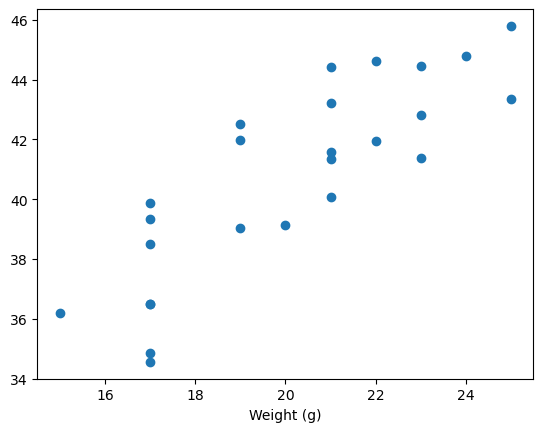

In [158]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatcap = cleanmice.loc[cleanmice['Drug Regimen'] == 'Capomulin', :]

avtumor = scatcap.groupby(['Mouse ID']).mean()

plt.scatter(avtumor['Weight (g)'], avtumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume(mm3)')

plt.show()

## Correlation and Regression

In [161]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(avtumor['Weight (g)'], avtumor['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {corr}')

The correlation between mouse weight and the average tumor volume is 0.84


In [162]:
#lin regress
regress = st.linregress(avtumor['Weight (g)'], avtumor['Tumor Volume (mm3)'])
regress

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

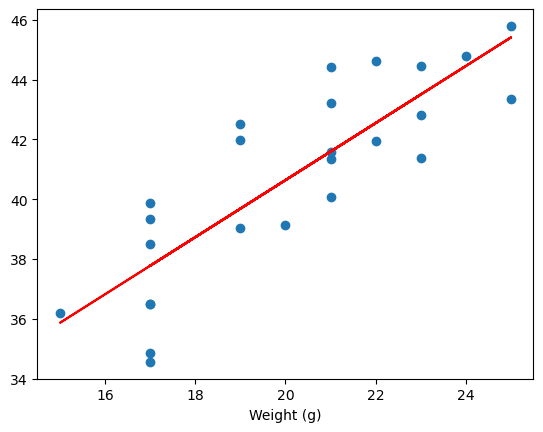

In [165]:
slope = 0.9544396890241048
inter = 21.552160532685008

reline = slope*(avtumor['Weight (g)']) + inter

plt.scatter(avtumor['Weight (g)'], avtumor['Tumor Volume (mm3)'])

plt.plot(avtumor['Weight (g)'], reline, 'r')
# plt.ylabel('Average Tumor Volume(mm3)')
plt.xlabel('Weight (g)')

plt.show()